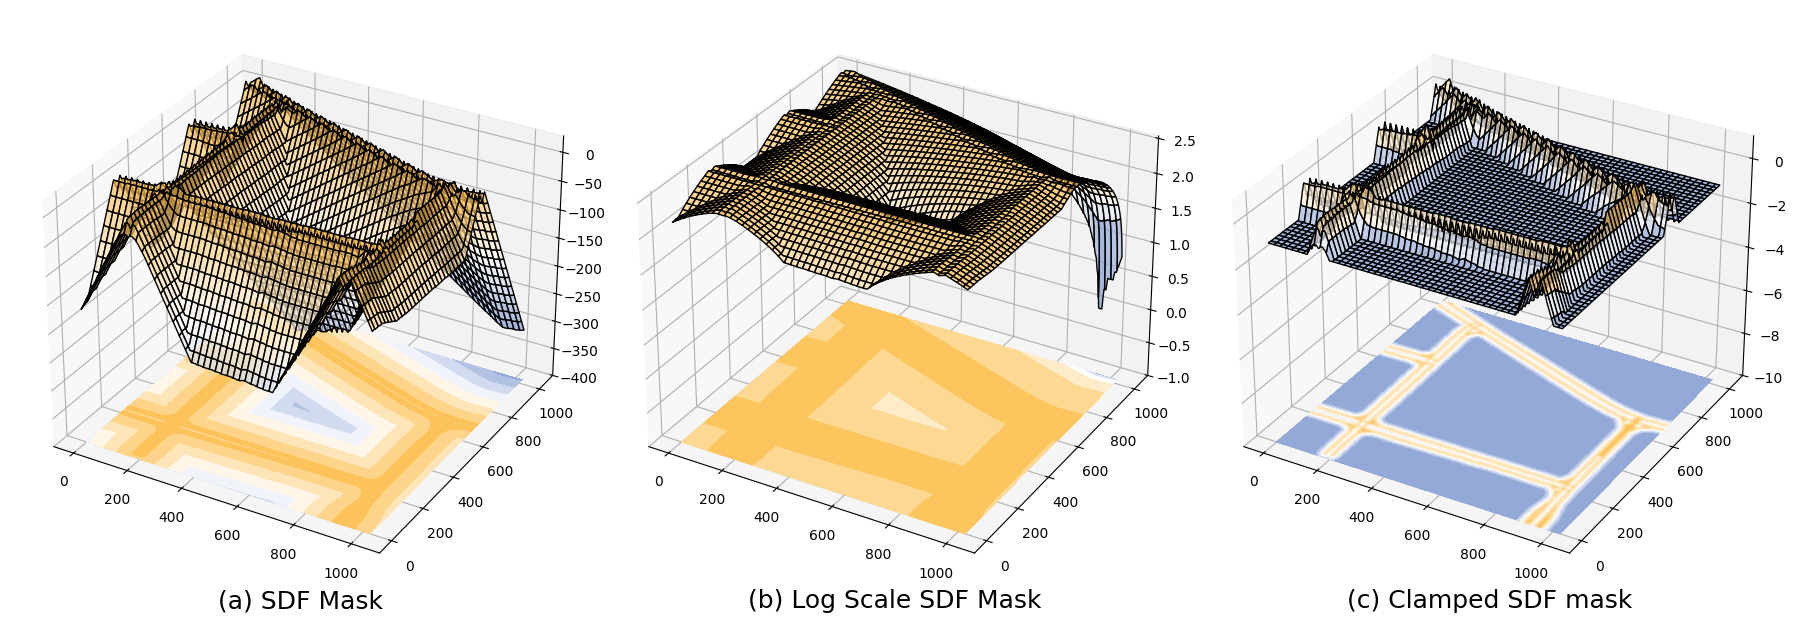

In [ ]:
# Visualization of clamp operation on the SDF mask
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap

# 生成网格数据
sdf_mask = np.load("/home/fk/python_code/datasets/dataset_sz_grid/test/mask_sdf_T/2003_6_mask.npy")

cmap = LinearSegmentedColormap.from_list(
    "custom_cmap",
    [(0, "#839DD1"), (0.5, "white"), (1, "#FCBB44")],  # 负值颜色、零值为白色、正值颜色
    N=256)

# 创建网格坐标
x = np.arange(sdf_mask.shape[1])
y = np.arange(sdf_mask.shape[0])
y_reversed = y[::-1]
X, Y = np.meshgrid(x, y_reversed)

# 创建图形
fig = plt.figure(figsize=(18, 12))

# 线性比例
ax1 = fig.add_subplot(131, projection='3d')
# Z_linear = (sdf_mask - sdf_mask.min() + 1)  # 避免负值的对数计算

surf1 = ax1.plot_surface(X, Y, sdf_mask, cmap=cmap, edgecolor='k', alpha=0.7)
ax1.contourf(X, Y, sdf_mask, zdir='z', offset=-400, cmap=cmap)  # 底部投影
ax1.set_title("(a) SDF Mask", fontsize=18, y=-0.05)
ax1.set_zlim(-400 , sdf_mask.max())

# 对数比例
ax2 = fig.add_subplot(132, projection='3d')
Z_log = np.log10(sdf_mask - sdf_mask.min() + 1)  # 避免负值的对数计算
surf2 = ax2.plot_surface(X, Y, Z_log, cmap=cmap, edgecolor='k', alpha=0.7)
ax2.contourf(X, Y, Z_log, zdir='z', offset=-1, cmap=cmap)  # 底部投影
ax2.set_title("(b) Log Scale SDF Mask", fontsize=18, y=-0.05)
ax2.set_zlim(-1, Z_log.max())

# clamped
sdf_mask_clamped = np.load("/home/fk/python_code/datasets/dataset_sz_grid/test/mask_sdf_clamped/2003_6_mask.npy")
ax3 = fig.add_subplot(133, projection='3d')

sdf_clamped = sdf_mask_clamped
surf3 = ax3.plot_surface(X, Y, sdf_clamped, cmap=cmap, edgecolor='k', alpha=0.7)
ax3.contourf(X, Y, sdf_clamped, zdir='z', offset=-10, cmap=cmap)  # 底部投影
ax3.set_title("(c) Clamped SDF mask", fontsize=18, y=-0.05)
ax3.set_zlim(-10, 1)

plt.tight_layout()
plt.show()


In [ ]:
# print the gradient norm of each layer in a model, testing code
for name, param in self.net.named_parameters():
    if param.grad is not None:
        print(f"Layer: {name} | Gradient Norm: {param.grad.norm()}")

import csv

# Open a CSV file to write the parameters and gradients
with open('model_gradients.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['Layer', 'Gradient Norm'])

    # Iterate over model parameters
    for name, param in self.net.named_parameters():
        if param.grad is not None:
            grad_norm = param.grad.norm().item()  # Get the gradient norm as a scalar
            writer.writerow([name, grad_norm])  # Write layer name and gradient norm to CSV

print("Model parameters and gradient norms saved to model_gradients.csv")


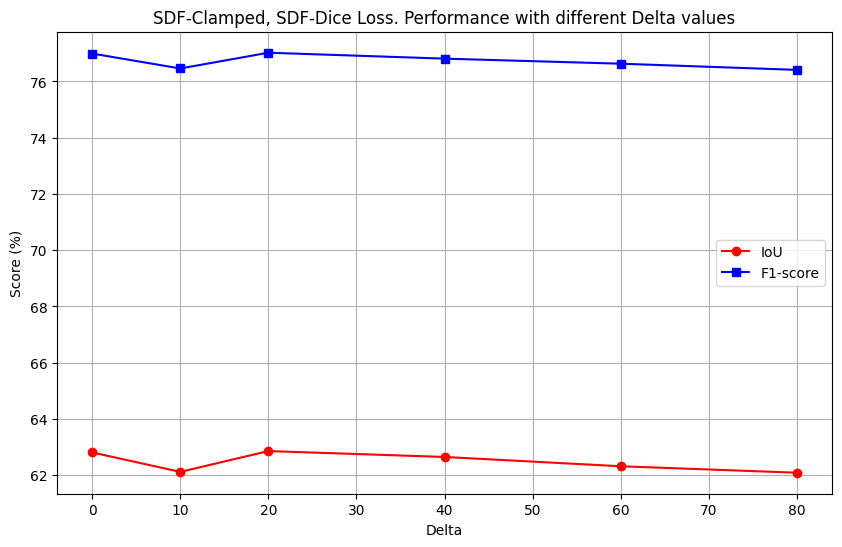

In [5]:
# bj dataset
import matplotlib.pyplot as plt

# 数据
deltas = [0, 10, 20, 40, 60, 80]
iou = [62.81, 62.12, 62.86, 62.65, 62.32, 62.09]
f1_score = [76.99, 76.46, 77.02, 76.81, 76.63, 76.41]

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制 IoU 和 F1-score 的折线图
plt.plot(deltas, iou, marker='o', label='IoU', color='r')
plt.plot(deltas, f1_score, marker='s', label='F1-score', color='b')

# 添加标题和标签
plt.title('SDF-Clamped, SDF-Dice Loss. Performance with different Delta values')
plt.xlabel('Delta')
plt.ylabel('Score (%)')

# 显示图例
plt.legend()

# 添加网格
plt.grid(True)

# 显示图表
plt.show()


In [ ]:
#testing code
import numpy as np
from PIL import Image

loaded_latent_representation = np.load("/home/fk/python_code/datasets/dataset_sz_grid/train_val/image_latent/0_8_sat.npy")
print(loaded_latent_representation.shape)
print(np.squeeze(loaded_latent_representation).shape)
image = Image.fromarray(np.transpose(np.squeeze(loaded_latent_representation),(1,2,0)), mode="RGB")
image.size
image


In [ ]:
#I don't know RGB image is better or GBA image is better.
from PIL import Image
import os

# 打开RGBA图像
image = Image.open("/home/fk/python_code/datasets/dataset_sz_grid/GPS/taxi_filtered_time_quantity_speed_patch/10_3_gps.png").convert("RGBA")

# 分离RGBA通道
r, g, b, a = image.split()

# 使用A通道代替R通道
new_image = Image.merge("RGB", (a, g, b))

# 保存或显示新图像
new_image.show()  # 显示图像
# new_image.save(os.path.join(path, "new_image.png"))  # 保存图像

# image.show()


In [ ]:
# rename files
import os

def rename_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith("_mask.png"):
            new_name = filename.replace("_mask.png", "_gps.png")
            old_path = os.path.join(directory, filename)
            new_path = os.path.join(directory, new_name)
            os.rename(old_path, new_path)
            print(f'Renamed: {old_path} -> {new_path}')

# Replace 'your_directory' with the path to the directory containing your files
rename_files('datasets/dataset_time/GPS/time_count_patch/')


In [ ]:
# 2D Wasserstein distance
import numpy as np
from scipy.ndimage import distance_transform_edt
from scipy.optimize import linear_sum_assignment
from tqdm import tqdm

def wasserstein_distance(image1, image2):
    # Compute the Euclidean distance transform of the binary images
    distance_map1 = distance_transform_edt(image1)
    distance_map2 = distance_transform_edt(image2)

    # Compute the cost matrix as the pairwise distances between non-zero pixels
    nonzero_indices1 = np.transpose(np.nonzero(image1))
    nonzero_indices2 = np.transpose(np.nonzero(image2))
    cost_matrix = np.linalg.norm(nonzero_indices1[:, None] - nonzero_indices2, axis=2)

    # Solve the assignment problem to find optimal pixel correspondences
    row_indices, col_indices = linear_sum_assignment(cost_matrix)

    # Calculate the Wasserstein distance
    wasserstein_dist = np.sum(cost_matrix[row_indices, col_indices] *
                              np.maximum(distance_map1[nonzero_indices1[row_indices, 0],
                                                        nonzero_indices1[row_indices, 1]],
                                         distance_map2[nonzero_indices2[col_indices, 0],
                                                        nonzero_indices2[col_indices, 1]]))

    return wasserstein_dist


# # Example usage:
# binary_image1 = np.array([[0, 0, 5],
#                           [1, 0, 0],
#                           [0, 1, 0]])
# binary_image2 = np.array([[0, 1, 0],
#                           [0, 0, 1],
#                           [1, 0, 0]])
# distance = wasserstein_distance(binary_image1, binary_image2)
# print("Wasserstein Distance:", distance)


mask_path = "datasets/sz_emd/mask"
pred_path = "datasets/sz_emd/pred/sat_only"

distance = 0
n = len(os.listdir(pred_path))
for filename in tqdm(os.listdir(pred_path)):
    if filename.endswith(".png"):
        pred_image = cv2.imread(os.path.join(pred_path, filename), cv2.IMREAD_GRAYSCALE)
        mask_image = cv2.imread(os.path.join(mask_path, f"{filename[:-4]}_mask.png"), cv2.IMREAD_GRAYSCALE)
        distance += wasserstein_distance(pred_image, mask_image)
average_distance = distance / n
print(f'Average Wasserstein distance: {average_distance}')

In [2]:
# Write average_distance to CSV file
import csv
# File path to save the CSV file
csv_file_path = "./emd.csv"
# Write average_distance to CSV file
average_distance = 0.5
for i in range(10):
    with open(csv_file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([i, average_distance])

In [ ]:
# find the filename with the highest epoch number
import os
import re

file_path = "./weights_sz_v1/dlink34_sat_gpsimage_gaussian_ltqs_log__"

# Regular expression pattern to match the epoch number
pattern = r'epoch(\d+)_'

# Initialize variables to store the maximum epoch number and corresponding filename
max_epoch = 0
max_epoch_filename = ""

# Iterate through filenames
for filename in os.listdir(file_path):
    # Check if the filename is not "prediction"
    if filename.endswith(".pth"):
        # Extract epoch number
        match = re.search(pattern, filename)
        if match:
            epoch_number = int(match.group(1))
            # Update max_epoch and max_epoch_filename if the current epoch number is higher
            if epoch_number > max_epoch:
                max_epoch = epoch_number
                max_epoch_filename = filename

# Print the filename with the highest epoch number
print("Filename with the highest epoch number:", max_epoch_filename)

In [ ]:
# Calculate the Wasserstein distance between two 1D arrays

from scipy.stats import wasserstein_distance
u = [0, 1, 2, 3]
v = [0, 1, 2, 3]

dis = wasserstein_distance(u, v, [0,0,1,0], [1, 1, 1, 1])
print(dis)

In [ ]:
# transpose mask from 1024x1024 to 128x128

import cv2
import os
import sys
sys.path.append('..')
from tqdm import tqdm

def transpose_image(input_path, output_path):
    # Read the input image
    img = cv2.imread(input_path)

    # Resize the image to 128x128 while maintaining aspect ratio
    resized_img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)

    # Save the resized image
    cv2.imwrite(output_path, resized_img)

# Example usage:
path = "datasets/dataset_sz_grid/test/mask"
save_path = "datasets/dataset_sz_grid/sz_2d_emd/mask"
iter = tqdm(os.listdir(path))
for filename in iter:
    if filename.endswith(".png"):
        input_image_path = os.path.join(path, filename)
        output_image_path = os.path.join(save_path, filename)
        transpose_image(input_image_path, output_image_path)
        iter.set_description_str(f"Processing {filename}")
print("Done!")

In [ ]:
# transpose the prediction of every model to 128x128
import os
from scipy.stats import wasserstein_distance
import cv2
import numpy as np
import csv
from tqdm import tqdm

def transpose_image(input_path, output_path):
    # Read the input image
    img = cv2.imread(input_path)

    # Resize the image to 128x128 while maintaining aspect ratio
    resized_img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)

    # Save the resized image
    cv2.imwrite(output_path, resized_img)


weights_dirs = ["weights_sz_v1", "weights_sz_v2", "weights_sz_v3"]
models = ["unet", "resunet", "deeplabv3+", "linknet", "dlink34_1d", "dlink34"]
methods = ["_gpsimage_only_gaussian_ltqs_log__", "_sat_gpsimage_gaussian_ltqs_log__"]
# methods = ["_gpsdata_only_count_direct__", "_sat_only____", "_sat_gpsdata_count_direct__"]


for weights_dir in weights_dirs:
    print(f"Transposing pred from 1024 to 128 size for {weights_dir}:")
    for model in models:
        print(f"Model: {model}")
        for method in methods:
            print(f"Method: {method}")
            folder_path = f"./{weights_dir}/{model}{method}"
            pred_path = os.path.join(folder_path, "prediction")
            save_path = os.path.join(folder_path, "prediction_transposed")
            if not os.path.exists(save_path):
                os.makedirs(save_path)
            iter = tqdm(os.listdir(pred_path))
            for filename in iter:
                if filename.endswith(".png"):
                    pred_image_path = os.path.join(pred_path, filename)
                    output_image_path = os.path.join(save_path, filename)
                    transpose_image(pred_image_path, output_image_path)
                    iter.set_description_str(f"Processing {filename}")

print('Done!')


In [ ]:
# Calculate 2D Wasserstein distance for every model
import numpy as np
from scipy.ndimage import distance_transform_edt
from scipy.optimize import linear_sum_assignment
from tqdm import tqdm
import cv2
import os
import csv

def wasserstein_distance(image1, image2):
    # Compute the Euclidean distance transform of the binary images
    distance_map1 = distance_transform_edt(image1)
    distance_map2 = distance_transform_edt(image2)

    # Compute the cost matrix as the pairwise distances between non-zero pixels
    nonzero_indices1 = np.transpose(np.nonzero(image1))
    nonzero_indices2 = np.transpose(np.nonzero(image2))
    cost_matrix = np.linalg.norm(nonzero_indices1[:, None] - nonzero_indices2, axis=2)

    # Solve the assignment problem to find optimal pixel correspondences
    row_indices, col_indices = linear_sum_assignment(cost_matrix)

    # Calculate the Wasserstein distance
    wasserstein_dist = np.sum(cost_matrix[row_indices, col_indices] *
                              np.maximum(distance_map1[nonzero_indices1[row_indices, 0],
                                                        nonzero_indices1[row_indices, 1]],
                                         distance_map2[nonzero_indices2[col_indices, 0],
                                                        nonzero_indices2[col_indices, 1]]))

    return wasserstein_dist


# # Example usage:
# binary_image1 = np.array([[0, 0, 5],
#                           [1, 0, 0],
#                           [0, 1, 0]])
# binary_image2 = np.array([[0, 1, 0],
#                           [0, 0, 1],
#                           [1, 0, 0]])
# distance = wasserstein_distance(binary_image1, binary_image2)
# print("Wasserstein Distance:", distance)


mask_path = "datasets/dataset_sz_grid/sz_2d_emd/mask"
csv_file_path = "./emd.csv"

weights_dirs = ["weights_sz_v1", "weights_sz_v2", "weights_sz_v3"]
models = ["unet", "resunet", "deeplabv3+", "linknet", "dlink34_1d", "dlink34"]
methods = ["_gpsimage_only_gaussian_ltqs_log__", "_sat_gpsimage_gaussian_ltqs_log__"]
# methods = ["_gpsdata_only_count_direct__", "_sat_only____", "_sat_gpsdata_count_direct__"]


n = len(os.listdir(mask_path))
for weights_dir in weights_dirs:
    for model in models:
        for method in methods:
            folder_path = f"./{weights_dir}/{model}{method}"
            print(f"Calculating Wasserstein distance for {folder_path}:")
            pred_path = os.path.join(folder_path, "prediction_transposed")
            iter = tqdm(os.listdir(pred_path))
            distance = 0
            for filename in iter:
                if filename.endswith(".png"):
                    pred_image = cv2.imread(os.path.join(pred_path, filename), cv2.IMREAD_GRAYSCALE)
                    mask_image = cv2.imread(os.path.join(mask_path, f"{filename[:-4]}_mask.png"), cv2.IMREAD_GRAYSCALE)
                    distance += wasserstein_distance(pred_image, mask_image)
                    iter.set_description_str(f"Processing {filename}")
            average_distance = distance / n
            # Write average_distance to CSV file
            with open(csv_file_path, mode='a', newline='') as file:
                writer = csv.writer(file)
                writer.writerow([folder_path, average_distance])
            print(f'{folder_path}: {average_distance}')
print('Done!')


In [ ]:
# check the pixels in road network image which has little road.

import cv2